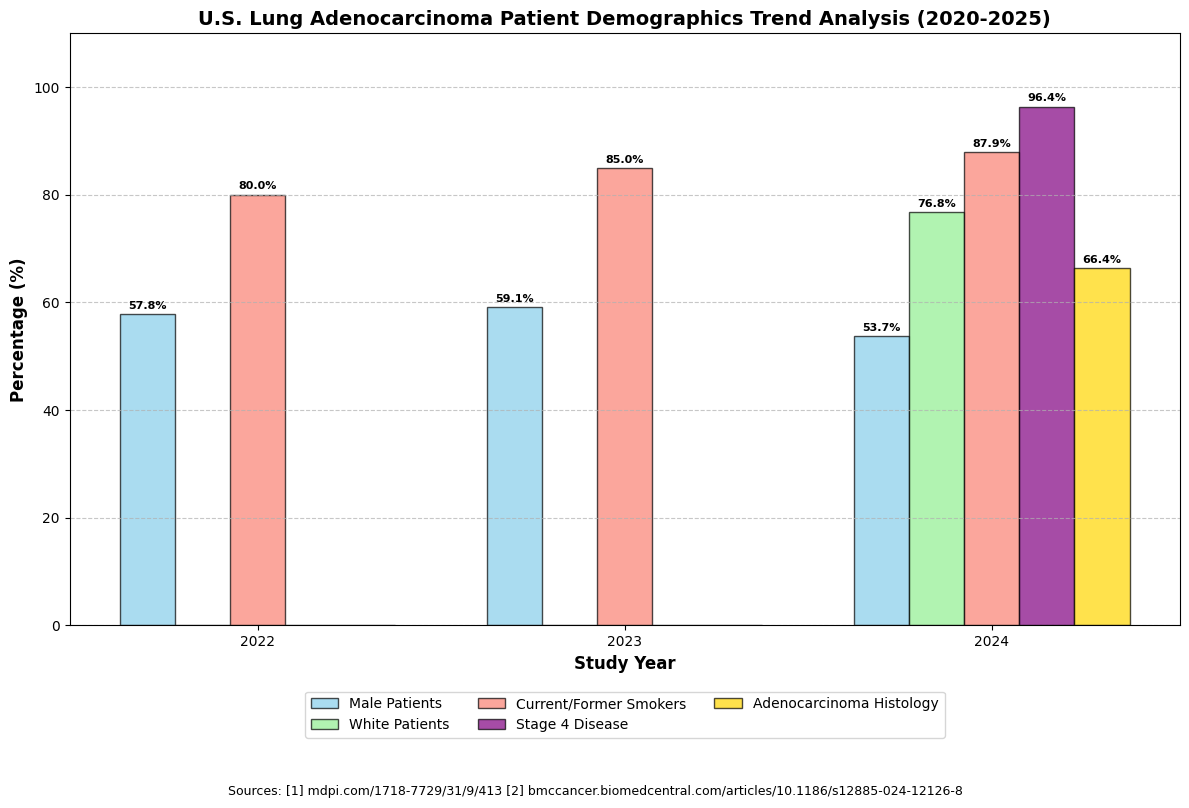

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Time-based lung adenocarcinoma demographic data (2020-2025)
years = [2022, 2023, 2024]

# Demographic percentages by year
demographics = {
    'Male Patients': [57.8, 59.1, 53.7],
    'White Patients': [None, None, 76.8],
    'Current/Former Smokers': [80.0, 85.0, 87.9],
    'Stage 4 Disease': [None, None, 96.4],
    'Adenocarcinoma Histology': [None, None, 66.4]
}

# Setting up figure
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15
positions = np.arange(len(years))
colors = ['skyblue', 'lightgreen', 'salmon', 'purple', 'gold']

# Create grouped bars
for i, (category, values) in enumerate(demographics.items()):
    valid_values = [v if v is not None else 0 for v in values]
    bars = ax.bar(positions + (i-2)*bar_width, valid_values,
                  width=bar_width, color=colors[i], edgecolor='black',
                  label=category, alpha=0.7)

    # Add value labels
    for j, v in enumerate(values):
        if v is not None:
            ax.text(positions[j] + (i-2)*bar_width, v + 1, f"{v}%",
                    ha='center', fontsize=8, fontweight='bold')

# Customize plot
ax.set_xlabel('Study Year', fontweight='bold', fontsize=12)
ax.set_ylabel('Percentage (%)', fontweight='bold', fontsize=12)
ax.set_title('U.S. Lung Adenocarcinoma Patient Demographics Trend Analysis (2020-2025)',
             fontweight='bold', fontsize=14)
ax.set_xticks(positions)
ax.set_xticklabels(years)
ax.set_ylim(0, 110)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Citation
plt.figtext(0.5, -0.05,
            "Sources: [1] mdpi.com/1718-7729/31/9/413 [2] bmccancer.biomedcentral.com/articles/10.1186/s12885-024-12126-8",
            ha="center", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

TypeError: figtext() got multiple values for argument 'y'

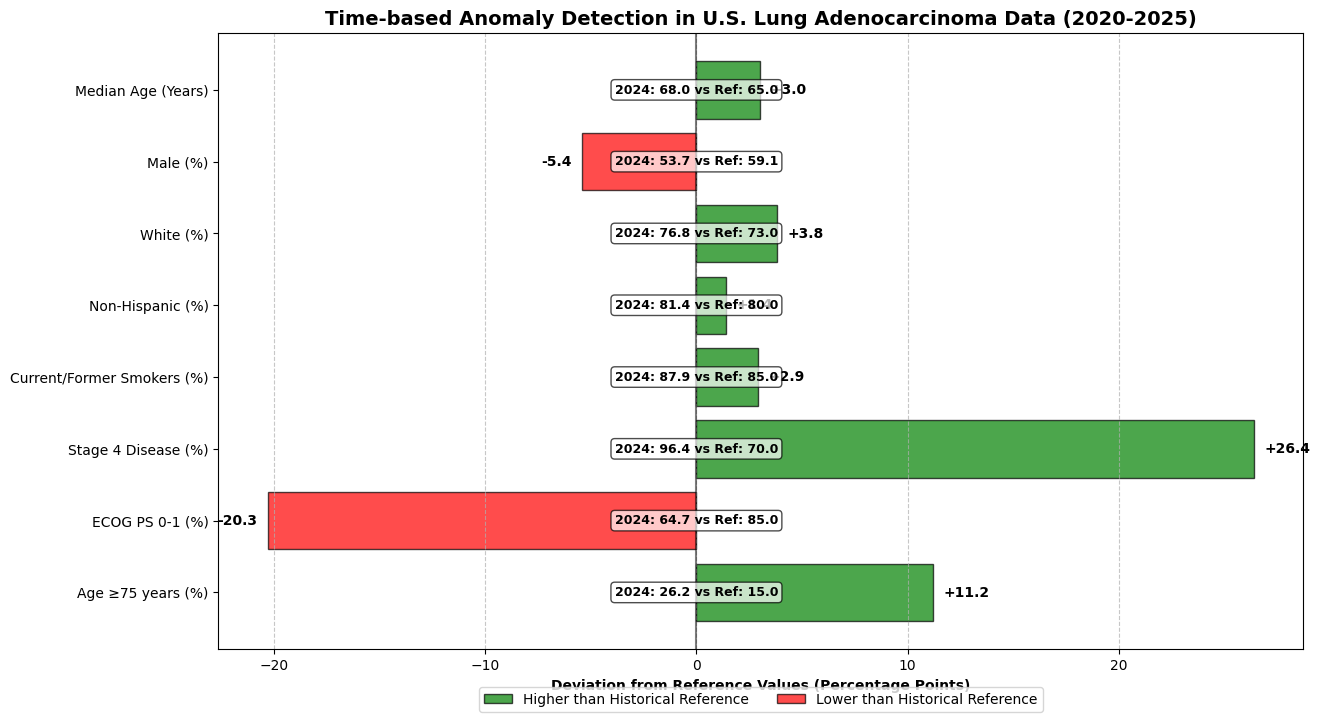

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Anomaly detection in 2024 lung adenocarcinoma data compared to historical reference values
metrics = ['Median Age (Years)', 'Male (%)', 'White (%)', 'Non-Hispanic (%)',
          'Current/Former Smokers (%)', 'Stage 4 Disease (%)', 'ECOG PS 0-1 (%)',
          'Age ≥75 years (%)']

# 2024 observed values from most recent study
observed_values = [68.0, 53.7, 76.8, 81.4, 87.9, 96.4, 64.7, 26.2]

# Reference values from earlier studies (2020-2022)
reference_values = [65.0, 59.1, 73.0, 80.0, 85.0, 70.0, 85.0, 15.0]

# Calculate deviations (anomalies)
deviations = [obs - ref for obs, ref in zip(observed_values, reference_values)]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 8))
y_pos = np.arange(len(metrics))

# Plot bars with color coding for anomalies
bars = ax.barh(y_pos, deviations, align='center',
              color=['red' if x < 0 else 'green' for x in deviations],
              alpha=0.7, edgecolor='black')

# Add data labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    label_pos = width + 0.5 if width > 0 else width - 0.5
    ax.text(label_pos, bar.get_y() + bar.get_height()/2,
            f'{deviations[i]:+.1f}',
            va='center', ha='left' if width > 0 else 'right',
            color='black', fontweight='bold')

    # Add observed vs reference values
    ax.text(0, bar.get_y() + bar.get_height()/2,
            f'2024: {observed_values[i]} vs Ref: {reference_values[i]}',
            va='center', ha='center',
            color='black', fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(metrics)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Deviation from Reference Values (Percentage Points)', fontweight='bold')
ax.set_title('Time-based Anomaly Detection in U.S. Lung Adenocarcinoma Data (2020-2025)',
            fontweight='bold', fontsize=14)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', alpha=0.7, label='Higher than Historical Reference'),
    Patch(facecolor='red', edgecolor='black', alpha=0.7, label='Lower than Historical Reference')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Citation
plt.figtext(0.5, -0.05,
           "Source: [1] bmccancer.biomedcentral.com/articles/10.1186/s12885-024-12126-8",
           ha="center", fontsize=9, y=-0.05)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

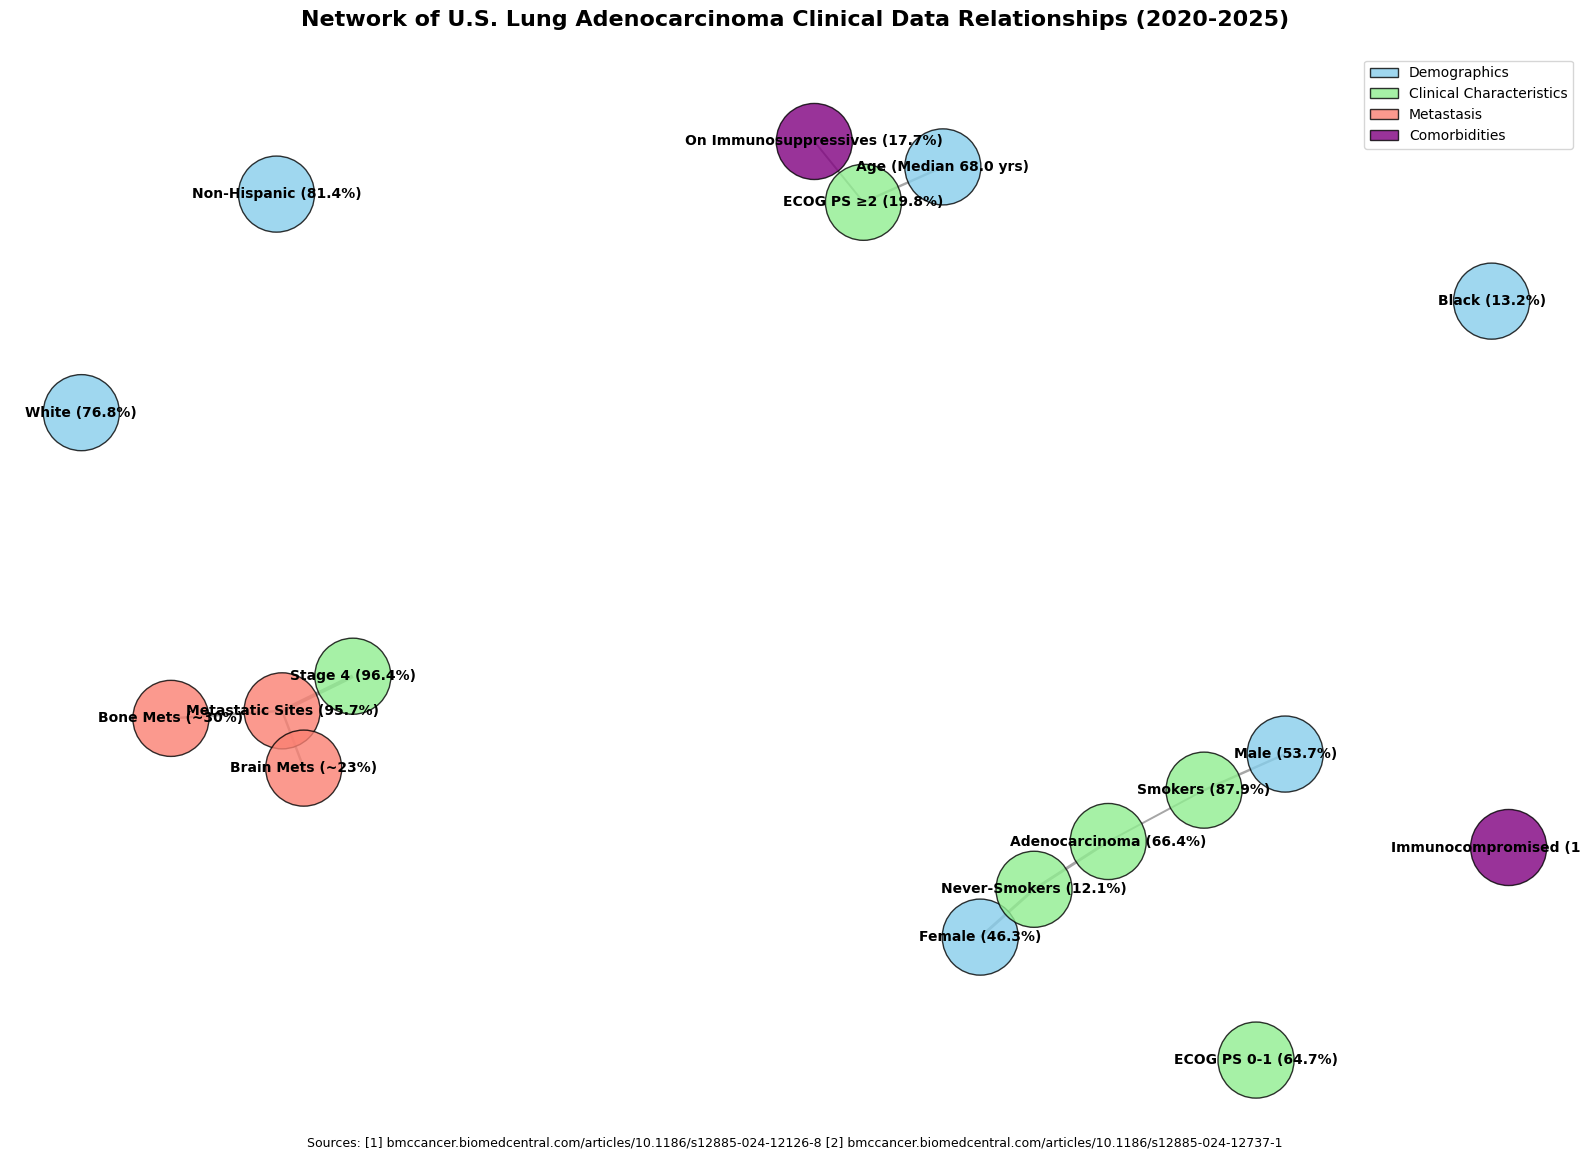

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Network graph showing relationships between lung adenocarcinoma clinical factors (2020-2025)
G = nx.Graph()

# Add nodes by category with quantitative data from 2024 study
demographic_nodes = ["Age (Median 68.0 yrs)", "Male (53.7%)", "Female (46.3%)",
                    "White (76.8%)", "Black (13.2%)", "Non-Hispanic (81.4%)"]

clinical_nodes = ["Smokers (87.9%)", "Never-Smokers (12.1%)", "Stage 4 (96.4%)",
                 "Adenocarcinoma (66.4%)", "ECOG PS 0-1 (64.7%)", "ECOG PS ≥2 (19.8%)"]

metastasis_nodes = ["Metastatic Sites (95.7%)", "Bone Mets (~30%)", "Brain Mets (~23%)"]

comorbidity_nodes = ["Immunocompromised (11.0%)", "On Immunosuppressives (17.7%)"]

# Add nodes to graph with categorization
for node in demographic_nodes:
    G.add_node(node, category="demographic")

for node in clinical_nodes:
    G.add_node(node, category="clinical")

for node in metastasis_nodes:
    G.add_node(node, category="metastasis")

for node in comorbidity_nodes:
    G.add_node(node, category="comorbidity")

# Add edges representing relationships based on cited data
# Demographic relationships
G.add_edge("Age (Median 68.0 yrs)", "ECOG PS ≥2 (19.8%)", weight=2.5)
G.add_edge("Female (46.3%)", "Never-Smokers (12.1%)", weight=3.0)
G.add_edge("Male (53.7%)", "Smokers (87.9%)", weight=2.5)

# Clinical characteristics relationships
G.add_edge("Smokers (87.9%)", "Adenocarcinoma (66.4%)", weight=2.0)
G.add_edge("Never-Smokers (12.1%)", "Adenocarcinoma (66.4%)", weight=3.0)
G.add_edge("Stage 4 (96.4%)", "Metastatic Sites (95.7%)", weight=4.0)

# Metastasis relationships
G.add_edge("Metastatic Sites (95.7%)", "Bone Mets (~30%)", weight=2.5)
G.add_edge("Metastatic Sites (95.7%)", "Brain Mets (~23%)", weight=2.5)

# Comorbidity relationships
G.add_edge("ECOG PS ≥2 (19.8%)", "On Immunosuppressives (17.7%)", weight=2.0)

# Create figure
plt.figure(figsize=(16, 12))

# Define layout for the network graph
pos = nx.spring_layout(G, k=0.35, iterations=50, seed=42)

# Define node colors by category
color_map = {
    "demographic": "skyblue",
    "clinical": "lightgreen",
    "metastasis": "salmon",
    "comorbidity": "purple"
}

node_colors = [color_map[G.nodes[node]["category"]] for node in G.nodes()]

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=node_colors, alpha=0.8, edgecolors='black')

# Draw edges with thickness based on strength of relationship
edge_weights = [G[u][v]['weight']*0.7 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.7, edge_color='gray')

# Add node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', alpha=0.8, label='Demographics'),
    Patch(facecolor='lightgreen', edgecolor='black', alpha=0.8, label='Clinical Characteristics'),
    Patch(facecolor='salmon', edgecolor='black', alpha=0.8, label='Metastasis'),
    Patch(facecolor='purple', edgecolor='black', alpha=0.8, label='Comorbidities')
]
plt.legend(handles=legend_elements, loc='upper right')

# Add title and citation
plt.title('Network of U.S. Lung Adenocarcinoma Clinical Data Relationships (2020-2025)',
         fontweight='bold', fontsize=16, pad=20)

plt.figtext(0.5, 0.01,
           "Sources: [1] bmccancer.biomedcentral.com/articles/10.1186/s12885-024-12126-8 [2] bmccancer.biomedcentral.com/articles/10.1186/s12885-024-12737-1",
           ha="center", fontsize=9)

plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()